In [28]:
#imports
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [29]:
#storing all data in dataframe
meteorite_df = pd.read_csv("meteorite_data.csv")
meteorite_df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,States,Counties
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",NaN,NaN


In [30]:
#listing column names
meteorite_df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation', 'States', 'Counties'],
      dtype='object')

In [31]:
#check for duplicates
meteorite_df[meteorite_df.duplicated()]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,States,Counties


In [32]:
#checking data types
meteorite_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
 10  States       1659 non-null   float64
 11  Counties     1659 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 4.2+ MB


In [33]:
#removing null values
meteorite_df = meteorite_df.dropna(subset=['year'])
meteorite_df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,States,Counties
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",NaN,NaN


In [34]:
#changing year datatype to remove decimal
meteorite_df.year.astype(np.int64)
meteorite_df['year'] = meteorite_df['year'].astype(int).astype(str)
meteorite_df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,States,Counties
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",NaN,NaN


In [35]:
#creating new dataframe containing relevant columns
meteorite_df2 = meteorite_df[["name","recclass","mass (g)", "fall", "year", "reclat", "reclong" ]]
meteorite_df2.head()

,name,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,L5,21.0,Fell,1880,50.77500,6.08333
1,Aarhus,H6,720.0,Fell,1951,56.18333,10.23333
2,Abee,EH4,107000.0,Fell,1952,54.21667,-113.00000
3,Acapulco,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000
4,Achiras,L6,780.0,Fell,1902,-33.16667,-64.95000


In [36]:
#renaming columns for clarity
meteorite_df2 = meteorite_df2.rename(columns={"recclass":"type of meteorite","reclat":"latitude","reclong":"longitude"})
meteorite_df2.head()

,name,type of meteorite,mass (g),fall,year,latitude,longitude
0,Aachen,L5,21.0,Fell,1880,50.77500,6.08333
1,Aarhus,H6,720.0,Fell,1951,56.18333,10.23333
2,Abee,EH4,107000.0,Fell,1952,54.21667,-113.00000
3,Acapulco,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000
4,Achiras,L6,780.0,Fell,1902,-33.16667,-64.95000


In [37]:
#creating new dataframe for mass
mass_df = meteorite_df2.loc[:, ["name","type of meteorite", "mass (g)"]]
mass_df.head()

,name,type of meteorite,mass (g)
0,Aachen,L5,21.0
1,Aarhus,H6,720.0
2,Abee,EH4,107000.0
3,Acapulco,Acapulcoite,1914.0
4,Achiras,L6,780.0


In [38]:
#finding counts for total meteorites found vs fell
fall_count = meteorite_df2.groupby("fall")
fall_count["name"].count()

fall
Fell      1107
Found    44318
Name: name, dtype: int64

In [39]:
#finding counts for meteorites per year
year_count = meteorite_df2.groupby("year")
year_count["name"].count()

year
1399      1
1490      1
1491      1
1495      1
1519      1
       ... 
2012    234
2013     11
2101      1
860       1
920       1
Name: name, Length: 265, dtype: int64

In [40]:
#changing entry year 2101 to 2000
meteorite_df2['year'] = meteorite_df2['year'].replace(2101, 2000)
year_count["name"].count()

year
1399      1
1490      1
1491      1
1495      1
1519      1
       ... 
2012    234
2013     11
2101      1
860       1
920       1
Name: name, Length: 265, dtype: int64

In [45]:
yearly_rates = meteorite_df2.year.value_counts() # count the amount of values for each year
yearly_rates = yearly_rates.sort_index()
yearly_rates


year
1399      1
1490      1
1491      1
1495      1
1519      1
       ... 
2012    234
2013     11
2101      1
860       1
920       1
Name: count, Length: 265, dtype: int64

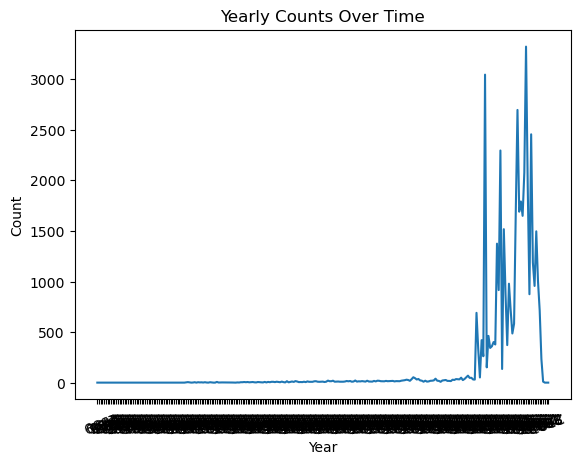

In [51]:
yearly_rates = meteorite_df2.year.value_counts() # count the amount of values for each year
yearly_rates = yearly_rates.sort_index()

plt.plot(yearly_rates.index, yearly_rates.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Counts Over Time')
plt.xticks(rotation=200)
plt.show()
